# FINAL PROJECT

## Karpov.Courses

### Nikita Axenov

**CONTENT**

TASK 1

    CONDITIONS
    
    SOLVATION
        GETTING DATA
        groups.csv - initial check
        group_add.csv - initial check
        active_students.csv - initial check
        ckecks.csv - initial check
        Summing up the initial data sets check
        Other checkings
            The 1st bullet - relations between data sets
            The 2nd bullet - who "active" are
        INITIAL WORK
        EXPERIMENT RESULTS ANALYSIS
            Calculating Convertion
            Checking Revenues
            Selecting a Statistical Test
            T-test
            
    CONCLUSION

# TASK 1

## CONDITIONS

During a test of a hypothesis **(! don't forget to name the H0 and H1 !)**
it was suggested to the **Test Group** to use a new site service payment mechanics.

It had been left for the **Control Group** to use the basic one.

Worth it or not to launch the new payment mechanics for all users?

## SOLVATION

In [44]:
import requests
from urllib.parse import urlencode

import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import shapiro, ttest_ind
#  kstest, t, norm, mannwhitneyu
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

plt.style.use('ggplot')

### GETTING DATA

First of all, collect suggested data.

In [2]:
# we have public links
groups = 'https://disk.yandex.ru/d/kMrULQ9QCD7-CQ'
group_add = 'https://disk.yandex.ru/d/TCBybqETWA8f5Q'
active_students = 'https://disk.yandex.ru/d/p2vilpAQAjrfMQ'
checks = 'https://disk.yandex.ru/d/8Au59cjThCOLCQ'

In [3]:
# url to download files via Yandex API
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download'

In [4]:
# 1st file to download - groups.csv
public_key = groups  # public link 

# get an url to download a file
response_url = f'{base_url}?public_key={public_key}'
the_response = requests.get(response_url)
loading_link = the_response.json()['href']

# download a file and save it
loaded_response = requests.get(loading_link)
with open('groups.csv', 'wb') as f:
    f.write(loaded_response.content)

In [5]:
# group_add.csv - 2nd to go
public_key = group_add  # public link 

# get an url to download a file
response_url = f'{base_url}?public_key={public_key}'
the_response = requests.get(response_url)
loading_link = the_response.json()['href']

# download a file and save it
loaded_response = requests.get(loading_link)
with open('group_add.csv', 'wb') as f:
    f.write(loaded_response.content)

In [6]:
# active_students.csv downloading
public_key = active_students  # public link 

# get an url to download a file
response_url = f'{base_url}?public_key={public_key}'
the_response = requests.get(response_url)
loading_link = the_response.json()['href']

# download a file and save it
loaded_response = requests.get(loading_link)
with open('active_students.csv', 'wb') as f:
    f.write(loaded_response.content)

In [7]:
# and the last one - checks.csv
public_key = checks  # public link 

# get an url to download a file
response_url = f'{base_url}?public_key={public_key}'
the_response = requests.get(response_url)
loading_link = the_response.json()['href']

# download a file and save it
loaded_response = requests.get(loading_link)
with open('checks.csv', 'wb') as f:
    f.write(loaded_response.content)

In [8]:
# read the files
groups = pd.read_csv('groups.csv', sep=';')
group_add = pd.read_csv('group_add.csv')
active_students = pd.read_csv('active_students.csv')
checks = pd.read_csv('checks.csv', sep=';')  # revenues on experiment days

Now, let's look at the present (initial) data sets.

### groups.csv - initial check

In [9]:
groups.head(3)  # A - the control group, B - the test one

,id,grp
0,1489,B
1,1627,A
2,1768,B


In [10]:
print(f'groups.csv initially has <{groups.shape[0]}> lines')
print(f'<{groups.id.nunique()/groups.shape[0]*100}%> lines of them are unique by "id"')
print(f'MAX id is <{groups.id.max()}>; min is <{groups.id.min()}> (the <{groups.id.dtype}> type)\n')

print(f'<{groups.columns[1]}> column has <{groups.grp.nunique()}> unique values: \
{groups.grp.unique()}, - the <{groups.dtypes[1]}> type')

groups.csv initially has <74484> lines
<100.0%> lines of them are unique by "id"
MAX id is <5694419>; min is <1489> (the <int64> type)

<grp> column has <2> unique values: ['B' 'A'], - the <object> type


In [11]:
print('groups.csv includes:')

groups_A_only = groups.query("grp == 'A'")
print(f'- <{groups_A_only.id.count()}> ({round(groups_A_only.id.count()/groups.shape[0]*100)}%) users \
are in the control group')  # .nunique() gives the same res (100% IDs are unique - see the cell above)

groups_B_only = groups.query("grp == 'B'")
print(f'- <{groups_B_only.id.count()}> ({round(groups_B_only.id.count()/groups.shape[0]*100)}%) users \
are in the test group')  # .nunique() gives the same res (100% IDs are unique - see the cell above)

groups.csv includes:
- <14671> (20%) users are in the control group
- <59813> (80%) users are in the test group


### group_add.csv - initial check

In [12]:
group_add.head(3)  # extra data set "in 2 days"

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B


In [13]:
print(f'group_add.csv initially has <{group_add.shape[0]}> lines')
print(f'<{group_add.id.nunique()/group_add.shape[0]*100}%> lines of them are unique by "id"')
# print(f'And <{len(set(groups.id) and set(group_add.id))}> (all) of them are encountered in groups.csv')
print(f'MAX id is <{group_add.id.max()}>; min is <{group_add.id.min()}> (the <{group_add.id.dtype}> type)\n')

print(f'<{group_add.columns[1]}> column has <{group_add.grp.nunique()}> unique values: \
{group_add.grp.unique()}, - the <{group_add.dtypes[1]}> type')

group_add.csv initially has <92> lines
<100.0%> lines of them are unique by "id"
MAX id is <201067659>; min is <5694584> (the <int64> type)

<grp> column has <2> unique values: ['B' 'A'], - the <object> type


In [14]:
print('GROUP_ADD.CSV includes:')

group_add_A_only = group_add.query("grp == 'A'")
print(f'- <{group_add_A_only.id.count()}> ({round(group_add_A_only.id.count()/group_add.shape[0]*100)}%) users \
are in the control group')  # .nunique() gives the same res (100% IDs are unique - see the cell above)

group_add_B_only = group_add.query("grp == 'B'")
print(f'- <{group_add_B_only.id.count()}> ({round(group_add_B_only.id.count()/group_add.shape[0]*100)}%) users \
are in the test group')  # .nunique() gives the same res (100% IDs are unique - see the cell above)

GROUP_ADD.CSV includes:
- <22> (24%) users are in the control group
- <70> (76%) users are in the test group


### active_students.csv - initial check

In [15]:
active_students.head(3)  # those who entered on experiment days

,student_id
0,581585
1,5723133
2,3276743


In [16]:
print(f'active_students.csv initially has <{active_students.shape[0]}> lines')
print(f'<{active_students.student_id.nunique()/active_students.shape[0]*100}%> lines of them are unique by "id"')
# print(f'And <{len(set(groups.id) and set(active_students.student_id))}> (all) of them are encountered in groups.csv')
print(f'MAX id is <{active_students.student_id.max()}>; \
min is <{active_students.student_id.min()}> (the <{active_students.student_id.dtype}> type)')

active_students.csv initially has <8341> lines
<100.0%> lines of them are unique by "id"
MAX id is <5951797>; min is <1627> (the <int64> type)


### checks.csv - initial check

In [17]:
checks.head(3)

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0


In [18]:
print(f'checks.csv initially has <{checks.shape[0]}> lines')
print(f'<{checks.student_id.nunique()/checks.shape[0]*100}%> lines of them are unique by "id"')
# print(f'And <{len(set(groups.id) and set(checks.student_id))}> (all) of them are encountered in groups.csv')
print(f'MAX id is <{checks.student_id.max()}>; \
min is <{checks.student_id.min()}> (the <{checks.student_id.dtype}> type)\n')

print(f'<{checks.columns[1]}> column has MAX revenue: <{checks.rev.max()}>, - \
and min value: <{checks.rev.min()}>, - the <{checks.dtypes[1]}> type')

checks.csv initially has <541> lines
<100.0%> lines of them are unique by "id"
MAX id is <5740903>; min is <1627> (the <int64> type)

<rev> column has MAX revenue: <4650.0>, - and min value: <199.0>, - the <float64> type


### Summing up the initial data sets check

We have such data:

- Clients IDs as the control group, as the test one;
- IDs of those clients who had entered in our education platform while experiment days;
- Revenues by each client while experiment days.

### Other checkings

I'd like to check the following at once:

- ~~What kind of & How many encountered issues can be found if we compare IDs in all 4 data sets? (Encountered issues between GROUPS & GROUPS_ADD / ACTIVE_STUDENTS & all GROUPS / CHECKS & all GROUPS)~~
- ~~Are there any user (ID) that paid (CHECKS) but didn't enter the platform (by condition - ACTIVE_STUDENTS)? If any, then payment may be accomplished without entering the platform, and "active" users are just those who were using the education platform itself.~~

#### The 1st bullet - relations between data sets

**Firstly**, check IDs between GROUPS & GROUPS_ADD:

In [19]:
k = 0
for i in group_add.id:
    for j in groups.id:
        if i == j:
            k += 1
print(f'There are <{k}> encountered issues between GROUPS & GROUPS_ADD by \'id\' column')

There are <0> encountered issues between GROUPS & GROUPS_ADD by 'id' column


<0> encountered issues signifies that there is no any problem with these two data sets.

(We could, e.g., find one or more similar IDs in both data sets, but values for \<grp\> column - different. That would be a conflict.)

**Secondly**, answer the question: "Are there any user from ACTIVE_STUDENTS who doesn't encounter in GROUPS and GROUP_ADD?"

In [20]:
# get Series of all IDs in both: GROUPS and GROUPS_ADD
all_id = pd.concat([groups.id, group_add.id], ignore_index=True)
all_id.shape[0] == groups.id.shape[0] + group_add.id.shape[0]  # correction check

True

In [21]:
k = len(set(active_students.student_id) & set(all_id))
print(f'There are <{k}> ({k/active_students.student_id.shape[0]*100}%) ACTIVE_STUDENT\'s IDs \
which are encountered among GROUPS\'s & GROUPS_ADD\'s IDs:')
print(f'\t<{len(set(active_students.student_id) & set(groups.id))}> of them encounter in GROUPS\'s IDs;')
print(f'\t<{len(set(active_students.student_id) & set(group_add.id))}> of them - in GROUPS_ADD\'s IDs.')

There are <8341> (100.0%) ACTIVE_STUDENT's IDs which are encountered among GROUPS's & GROUPS_ADD's IDs:
	<8328> of them encounter in GROUPS's IDs;
	<13> of them - in GROUPS_ADD's IDs.


<100.0%> of such encountered IDs signifies that there is no any user in ACTIVE_STUDENTS who erroneously was added into the data set, and all the active users are determined to the corresponding groups: test or control one.

**Thirdly**, the last question pertinent to the bullet we check: "Are there any user from CHECKS who doesn't encounter in GROUPS and GROUP_ADD?"

(Yes, it's similar to the previous question. And check almost the same.)

In [22]:
k = len(set(checks.student_id) & set(all_id))
print(f'There are <{k}> ({k/checks.student_id.shape[0]*100}%) CHECKS\'s IDs \
which are encountered among GROUPS\'s & GROUPS_ADD\'s IDs:')
print(f'\t<{len(set(checks.student_id) & set(groups.id))}> of them encounter in GROUPS\'s IDs;')
print(f'\t<{len(set(checks.student_id) & set(group_add.id))}> of them - in GROUPS_ADD\'s IDs.')

There are <541> (100.0%) CHECKS's IDs which are encountered among GROUPS's & GROUPS_ADD's IDs:
	<540> of them encounter in GROUPS's IDs;
	<1> of them - in GROUPS_ADD's IDs.


<100.0%> of such encountered IDs signifies that there is no any paying user who erroneously was added into the data set, and all the paying users are determined to the corresponding groups: test or control one.

<u>1st bullet</u> (in "I'd like to check" list) is <u>accomplished</u>. Now we can cross it out and go to the next one.

#### The 2nd bullet - who "active" are

We should compare IDs in CHECKS and ACTIVE_STUDENTS

In [23]:
k = len(set(checks.student_id) - set(active_students.student_id))
print(f'There are <{k}> users ({round(k/checks.student_id.shape[0]*100)}% of CHECKS) \
who paid while experiment days but didn\'t enter the platform')

There are <149> users (28% of CHECKS) who paid while experiment days but didn't enter the platform


As we mentioned above: If any <i>(and we have <149>)</i>, then 
- payment may be accomplished without entering the platform, 
- and "active" users are just those who were using the education platform itself,

but also
- <u>payment process doesn't require entering the platform</u>.

<i>(the points above were not stipulated in the task; that's why they should be and they are checked)</i>

<u>2nd bullet</u> is <u>accomplished</u>: crossing it out and proceeding to the following work.

### INITIAL WORK

Create a total data frame for all 4 data sets and then look at descriptive statistics.

In [24]:
# concatenate GROUPS and GROUP_ADD data sets
total = pd.concat([groups, group_add], axis=0, ignore_index=True).rename(columns={'id': 'student_id'})

In [25]:
# join TOTAL and ACTIVE_STUDENTS
active_students['active'] = True
total = total.merge(active_students, on='student_id', how='left').fillna(False)

In [26]:
total.head(3)

,student_id,grp,active
0,1489,B,False
1,1627,A,True
2,1768,B,False


In [27]:
# join TOTAL and ACTIVE_STUDENTS
total = total.merge(checks, on='student_id', how='left').fillna(0)

In [28]:
total.head(3)

,student_id,grp,active,rev
0,1489,B,False,0.0
1,1627,A,True,990.0
2,1768,B,False,0.0


Look at shares of each group.

In [29]:
# A - the control group, B - the test one
control_grp = total.query("grp == 'A'")
test_grp = total.query("grp == 'B'")
print(f'Control group:\t<{control_grp.shape[0]}> ({round(control_grp.shape[0]/total.shape[0]*100)}%)')
print(f'Test gtoup:\t<{test_grp.shape[0]}> ({round(test_grp.shape[0]/total.shape[0]*100)}%)')

Control group:	<14693> (20%)
Test gtoup:	<59883> (80%)


Look at descriptive statistics of each group.

In [30]:
'''for all users
in control group'''
control_grp.rev.describe()

count    14693.000000
mean         6.268019
std        100.790849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3660.000000
Name: rev, dtype: float64

In [31]:
'''for all users
in test group'''
test_grp.rev.describe()

count    59883.000000
mean         8.036171
std        113.249998
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4650.000000
Name: rev, dtype: float64

Looking at Descriptive Statistics **for all users** (paying and not), yes, we can say test's mean is <u>a bit higher</u> than control's mean, and test's sample became <u>less homogeneous</u> (std: +13) than control's sample, but these don't say anything concrete.

In [32]:
'''for paying users
in control group'''
control_grp.query("rev != 0").rev.describe()

count     107.000000
mean      860.710280
std       815.893445
min       199.000000
25%       290.000000
50%       690.000000
75%       990.000000
max      3660.000000
Name: rev, dtype: float64

In [33]:
'''for paying users
in control group'''
test_grp.query("rev != 0").rev.describe()

count     434.000000
mean     1108.824893
std       741.834304
min       199.000000
25%       420.750000
50%       935.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

Studying of Descriptive Statistics **for paying users** only is showing as growth of mean as increased homogeneity (comparing test group with control one), but these still don't say anything concrete.

To answer the main question of the Task:
> "Worth it or not to launch the new payment mechanics for all users?", -

we should do the following:
- Calculate Conversion for each group (maybe it decreased after new mechanics),
- Take a test to understand is there a statistically significant difference between mean values of test's / control's revenue or not,
    - H0: There is no a statistically significant difference between two samples,
    - H1: There is such a difference,
- Make a conclusion on the Question.


All the Initial work is done. Now we have Experiment terms, cleared enough, and Data which we can analyse!

### EXPERIMENT RESULTS ANALYSIS

#### Calculating Convertions

In [34]:
conversion_control_grp = round(control_grp.query('rev > 0').shape[0] / control_grp.shape[0] * 100, 2)
print(f'Conversion in control group: <{conversion_control_grp}%>')
conversion_test_grp = round(test_grp.query('rev > 0').shape[0] / test_grp.shape[0] * 100, 2)
print(f'Conversion in test group: <{conversion_test_grp}%>')
conv_diff = round(conversion_test_grp-conversion_control_grp, 2)
print(f'Delta: <{conv_diff}%> (abs) or <{round(conv_diff/conversion_control_grp*100, 2)}%%> (rel) - \
We can compare this metric in this way, so, as we see, Conversion slightly decreased after changes.')

Conversion in control group: <0.73%>
Conversion in test group: <0.72%>
Delta: <-0.01%> (abs) or <-1.37%%> (rel) - We can compare this metric in this way, so, as we see, Conversion slightly decreased after changes.


Since we see a deterioration of conversion, we should check Revenues by the following formula:
> Revenue = Conversion * ARPPU

#### Checking Revenues

In [35]:
# ARPPUs calculation
ARPPU_control_grp = round(control_grp.rev.sum() / control_grp.query('rev > 0').shape[0], 2)
print(f'ARPPU of control group: <{ARPPU_control_grp}>')
ARPPU_test_grp = round(test_grp.rev.sum() / test_grp.query('rev > 0').shape[0], 2)
print(f'ARPPU of test group: \t<{ARPPU_test_grp}> (increased)')

ARPPU of control group: <860.71>
ARPPU of test group: 	<1108.82> (increased)


In [36]:
# Revenues calculation
revenue_contol_grp = round(conversion_control_grp * ARPPU_control_grp, 2)
print(f'Revenue of control group: <{revenue_contol_grp}>')
revenue_test_grp = round(conversion_test_grp * ARPPU_test_grp, 2)
print(f'Revenue of test group:    <{revenue_test_grp}> (increased)')

Revenue of control group: <628.32>
Revenue of test group:    <798.35> (increased)


Well, it still looks inspiring.

That means, <u>if</u> we have <u>changes of revenues</u> by users from control and test groups which are <u>statistically significant</u> <u>then</u> we should assume the <u>new mecanics</u> as worthy <u>to launch</u> (the <u>Revenues</u> calculated one cell above are real and the <u>test's one</u> is actually <u>higher</u>).

#### Selecting a Statistical Test

To get right results of our statistical test we should select a proper test. Such a selection depends on several parameters:
>1. variables' types
>2. outliers presence
>3. type of distribution

Pertinent to our data we have:


>1. Continuous data (revenue)
>2. ...

Looking for outliers presence

<AxesSubplot:xlabel='grp', ylabel='rev'>

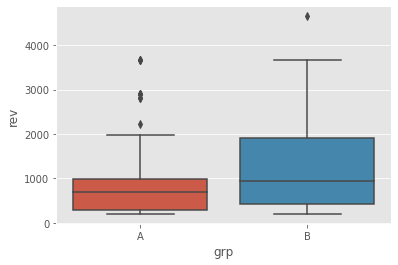

In [37]:
sns.boxplot(data=total.query('rev > 0'), x='grp', y='rev')

Yes, we have outliers in both control (especially) and test groups. That's why...

...

>2. Outliers are present 

Try to correct it by transforming the data

In [38]:
total['log_rev'] = np.log(total.query('rev>0').rev)

<AxesSubplot:xlabel='grp', ylabel='log_rev'>

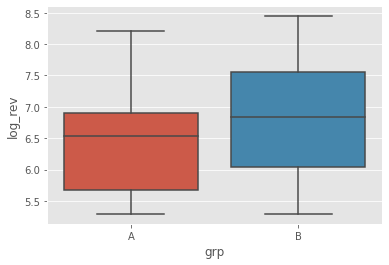

In [39]:
sns.boxplot(data=total.query('rev > 0'), x='grp', y='log_rev')

Thus,

>2. There are not outliers (for log(revenue))

Checking type of distibutions...

__ Revenue Distribution in Control group (A) __


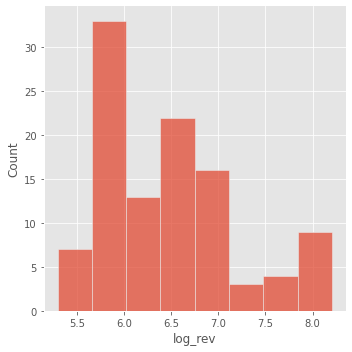

In [40]:
print('__ Revenue Distribution in Control group (A) __')
sns.displot(total.query('grp == "A"').dropna().log_rev)

In [41]:
if shapiro(total.query('grp == "A"').dropna().log_rev)[1] < 0.05: print('Normal Distribution in Control group is Confirmed')

Normal Distribution in Control group is Confirmed


__ Revenue Distribution in Test group (A) __


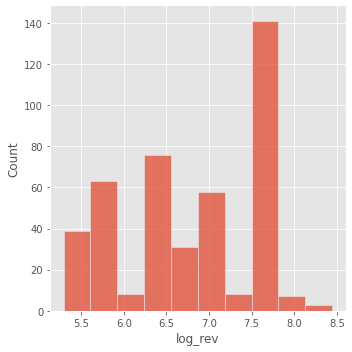

In [42]:
print('__ Revenue Distribution in Test group (A) __')
sns.displot(total.query('grp == "B"').dropna().log_rev)

In [43]:
if shapiro(total.query('grp == "B"').dropna().log_rev)[1] < 0.05: print('Normal Distribution in Test group is Confirmed')

Normal Distribution in Test group is Confirmed


Thus, both samples are from normal distribution.

That is why we have:
>1. Continuous data (revenue)
>2. Values with no outliers
>3. Normal Distributed data

All of these points satisfy assumptions of t-test. That is why we apply it.

#### T-test

In [47]:
ttest_res = ttest_ind(total.query('grp == "A"').dropna().log_rev, total.query('grp == "B"').dropna().log_rev)
ttest_res

Ttest_indResult(statistic=-3.5317260011999694, pvalue=0.0004482400492255287)

In [49]:
if ttest_res[1]<0.05: print('There is a statistical significance between control and test groups.')

There is a statistical significance between control and test groups.


In [59]:
print(f'The test\'s results allow us to state that the new payment mechanics actually increases \
ARPPU up to {ARPPU_test_grp} c.u. (+{round((ARPPU_test_grp-ARPPU_control_grp)/ARPPU_control_grp*100)}%).')


The test's results allow us to state that the new payment mechanics actually increases ARPPU up to 1108.82 c.u. (+29%).


## CONCLUSION

T-test method on the targeted ARPPU tells us we have a significant difference between Test and Control groups. That's why we should launch the new payment mechanic for all users.

***

# TASK 2

## Задача 2

Есть таблица: peas

Есть колонки:
- st_id   -- ID ученика
- timest  -- Время решения карточки
- correct -- Правильно ли решена горошина?
- subject -- Дисциплина, в которой находится горошина

Усердный ученик - это тот, у которого:
- хотя бы 1 раз за месяц правильно решено 20 горошин за час.

In [ ]:
# Изначальное условие
st_id - int - ID ученика
timest - timestamp - Время решения задания
correct - bool - Правильно ли решено задание

усердный ученик - тот, который хотя бы раз за текущий месяц правильно решил 20 задач за час

Дать информацию о количестве очень усердных студентов за март 2020 года

### Objective

Найти количество усердных учеников за март 2020.

## Решение

Готовим данные.
- отсеиваем данные по колонке timest так, чтобы остались только данные за март 2020.
- берем в колонку spent общее кол-во минут, потраченных на выполнение задания, из данных колонки timest для каждого пользователя.

In [ ]:
SELECT
    st_id AS ID,
    minute(timest)+(minute(timest)*60) AS spent,
    correct
FROM some_database.peas
WHERE
    month(timest) = 3
    AND year(timest) = 2020

LIMIT 100

- считаем скользящую сумму по колонкам spent и correct (далее будем агрегировать их по ID).
- теперь у нас есть для каждого ID массивы с накопительными значениями потраченного времени и решенных задач.
- тогда нам остается найти время решения десятой задачи.
- для обоих массивов (что в колонке spent, что в колонке correct) порядок значений сохранен так, что, если мы в массиве correct найдем порядковый номер 20, то по этому же номеру мы сможем отыскать время, затраченное студентом для достижения этих 20 правильно решенных задач, из массива spent.
- поэтому мы создаем условие вывода после заданной агрегации тех строк, у которых
    - во-первых, число 20 вообще есть среди значений массивов колонки solved_cumulative: indexOf(solved_cumulative,20) > 0
    - во-вторых, эти 20 задач решены за время не более часа: spent_cumulative[indexOf(solved_cumulative,20)] <= 60
- и выводим из полученных данных только ID

In [ ]:
SELECT ID
FROM
    (
    SELECT 
        ID,
        groupArrayMovingSum(spent) AS spent_cumulative,
        groupArrayMovingSum(correct) AS solved_cumulative
    FROM
        (
        SELECT
            st_id AS ID,
            minute(timest)+(minute(timest)*60) AS spent,
            correct
        FROM some_database.peas
        WHERE
            month(timest) = 3
            AND year(timest) = 2020
        )
    GROUP BY ID
    HAVING 
        indexOf(solved_cumulative,20) > 0
        AND spent_cumulative[indexOf(solved_cumulative,20)] <= 60
    ORDER BY ID
    )
-- однако есть опасения, что нужна была сортировка вида ID, timest, чтобы упорядочить значения.

---

---

---

**РАБОТА НАД ОШИБКАМИ в этом задании:**

В этой задаче сказано "найти количество" таких учеников. Мой же запрос выводит только их ID.

Соответственно, мне нужно в текущем результате запроса лишь посчитать количество (уникальных, на всякий случай) ID и вывести это значение.

Таким образом, финальный мой ответ на поставленное условие в задании - ниже:

In [ ]:
SELECT count (DISTINCT ID)
FROM
    (
    SELECT 
        ID,
        groupArrayMovingSum(spent) AS spent_cumulative,
        groupArrayMovingSum(correct) AS solved_cumulative
    FROM
        (
        SELECT
            st_id AS ID,
            minute(timest)+(minute(timest)*60) AS spent,
            correct
        FROM some_database.peas
        WHERE
            month(timest) = 3
            AND year(timest) = 2020
        )
    GROUP BY ID
    HAVING 
        indexOf(solved_cumulative,20) > 0
        AND spent_cumulative[indexOf(solved_cumulative,20)] <= 60
    ORDER BY ID
    )
-- однако есть опасения, что нужна была сортировка вида ID, timest, чтобы упорядочить значения.

**Внимание:**

!!!: *Далее идет блок лишь для обсуждения возможного дополнительного решения этой задачи.*

Честно признаюсь, я попросил помощи у своего друга: попросил его написать такой запрос, который отражал бы его видение на решение этой задачи. При этом я упростил начальную задачу, приведя ее к подобной. В итоге, придерживаясь его "пайплайна" решения, на основе его кода, и сублимируя это с начальным условием задачи, я получил такой запрос: 

In [ ]:
SELECT ID
FROM (
    SELECT  ID,
            time,
            rn,
            sum(time) over (partition by ID order by ID, rn) as sum_time
    FROM (
        SELECT ID,
                time,
                row_number() over (partition by ID order by time) as rn
        FROM (
            SELECT ID, time
            FROM (
                SELECT
                    st_id AS ID,
                    minute(timest)+(minute(timest)*60) AS time,
                    correct
                FROM some_database.peas
                WHERE
                    month(timest) = 3
                    AND year(timest) = 2020
            ) as table
            WHERE correct = 1
        ) as only_correct_answers
    ) as order_by_low_time
) as sum_time_in_one_id
WHERE rn = 20 and sum_time < 60;

Хотелось бы обсудить его вместе со знающим и компетентным человеком :)

Мои мысли:

Судя по тому, как мне объяснил друг, его запрос делает следующее:
- он отбирает только данные с правильными ответами учеников,
- далее посредством оконных функций суммирует данные по времени и решенным задачам,
- и отбирает те ID, в данных которых 20 решенных задач и время до 60 минут.

Чем отличается такой алгоритм от представленного моего?

Дело в том, что если мы представим такую ситуацию, что ученик: 1) сделал, к примеру, первую задачу за 5 минут, 2) затем вторую задачу он решал с несколькими неудачными попытками: при первой попытке он потратил 20 мин и не решил (correct = 0), при второй - 10 мин и не решил, а при третьей - 5 мин и отправил, наконец, верный ответ (correct = 1), - то решение друга выдаст, что ученик решил эти две задачи за 10 мин (5 мин от первой задачи + 5 мин от третьей попытки второй задачи). При этом думая над своим решением, я пытался сделать так, чтобы в итоге мой запрос показал бы решение двух задач в этом случае за (5+20+10+5) 40 мин. Ведь не зря же нам данные именно в формате TimeStamp даны - чтобы мы имели, так скажем, абсолютное значение времени. Но условие задачи не уточняет этот момент. Поэтому я и привожу здесь это решение для обсуждения.

Спасибо большое, если проверите и его.

**КОНЕЦ РАБОТЫ НАД ОШБКАМИ в этом задании**

---

---

---

## Задача 3

## Условие

Реализовать функцию, 

которая будет **автоматически** подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться)

и на основании дополнительных параметров пересчитывать метрики.

## Решение

Так как в решении **Задачи 1** никаких особых метрик для проверки A/B теста не использовалось, а только проводился Bootstrap, то попробую реализовать функцию, способную автоматически подгружать данные и самостоятельно проводить Bootstrap.

- т.е., мы уже имеем наш датафрейм со всеми результатами, который мы сделали в Задании1 (пусть это result_df.csv).
- а запуская функцию, python сам должен найти файл (groups_add.csv), выгрузить из него данные, добавить их в result_df.csv, обработать, дать оценку.
- также я делаю допущение, что в groups_add.csv помимо колонок из первого задания (id, grp) есть и rev. Должна быть rev, так как по ней мы и считаем успешность новых фич, а в условии не сказано, что нам дается новый файл для checks.

In [1]:
def get_updated_stat():
    # import all necessary modules
    # modules for getting data
    import requests
    from urllib.parse import urlencode
    # std
    import pandas as pd
    import numpy as np
    # for bootstrap
    from scipy.stats import norm
    from tqdm.auto import tqdm
    
    # download new data
    project_2_goup_add = 'https://disk.yandex.ru/d/3aARY-P9pfaksg'
    public_key = project_2_goup_add  # Сюда вписываете ссылку
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # Загружаем файл и сохраняем его
    download_response = requests.get(download_url)
    with open('project_2_goup_add.csv', 'wb') as f:   # Здесь - путь к файлу
        f.write(download_response.content)
    
    # open previous result data and new data as a Data Frame
    result_df = pd.read_csv('result_df.csv')
    # start columns: student_id, grp, was_active, rev
    groups_add_df = pd.read_csv('project_2_goup_add.csv', names=['student_id', 'grp', 'rev'])
    # start columns: id, grp, rev, - but their exact names can be different
    
    # prepare data fot bootstrap
    result_df.drop(columns=['was_active'])  # after that we have identical columns
    result_df = pd.concat([result_df, groups_add_df], axis=0)  # and a general DataFrame with a new data
    A_df = result_df.query('grp == "A"')  # control grp
    B_df = result_df.query('grp == "B"')  # test grp
    
    # do bootstrap
    # some init data for bootstrap
    data_column_1 = B_df.rev,  # числовые значения первой выборки
    data_column_2 = A_df.rev,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующая нас статистика
    bootstrap_conf_level = 0.95  # уровень значимости    
    # bootstrap itself
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace=True
        ).values

        boot_data.append(statistic(samples_1 - samples_2))
        # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
#         # Визуализация
#     plt.hist(pd_boot_data[0], bins = 50)
    
#     plt.style.use('ggplot')
#     plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
#     plt.xlabel('boot_data')
#     plt.ylabel('frequency')
#     plt.title("Histogram of boot_data")
#     plt.show()

    if p_value < 0.05:
        print('Контрольная и Тестовая группы, данные по которым обновлены, ',
              'статистически значимо различаются./n')
    else:
        print('Контрольная и Тестовая группы, данные по которым обновлены, ',
              'статистически НЕ различаются./n')
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}


---

---

---

**РАБОТА НАД ОШИБКАМИ в этом задании:**

В замечании к выполнению этого задания Олег дал такую формулировку:

"Подгружается groups_add, который имеет ту же структуру, что и groups (айдишник и метка группы, столбца rev там нет и быть не должно)...".

Данные в groups и groups_add имеют следующую структуру:

колонки: | {id ученика} | {группа: целевая/контрольная} |

По этим данным что мог бы я посчитать, какие метрики посмотреть?
- отношение количества учеников целевой группы ко всем ученикам? - Да, легко.
- конверсию в покупку? - Нет, для этого мне пришлось бы "смерджить" эти данные (подгружаемые) с данными о revenue. Что я и реализовал в своем первоначальном напсании функции. Но данные о revenue, по замечанию Олега, подгружать не нужно. Значит, конверсию я не смогу посчитать.
- ARPU/ARPPU? - Ну, точно не смогу посчитать. Для них нужна колока |{выручка}|, которую подгружать не нужно.
- сделать bootstrap? - Но по какой колонке? По |{id ученика}| и |{группа: целевая/контрольная}| этого делать не имеет смысла.

Поэтому я считаю, что моя функция валидна и для текущего замечания. К тому же разные имена колонок я также учел, о чем свидетельствуют:
- комментарий в группе "# open previous result data and new data as a Data Frame", который гласит: "# start columns: id, grp, rev, - but their exact names can be different";
- манипуляции с данными посредством кода в блоке функции под комментарием "# prepare data fot bootstrap".

Я бы очень хотел обсудить это задание при голосовом общении.

**КОНЕЦ РАБОТЫ НАД ОШБКАМИ в этом задании**

---

---

---